# Python project. Data Science & ML

### A study of the factors (various characteristics) that affect vehicle CO2 emissions in Canada.

### Building a model capable of predicting the amount of CO2 emissions a vehicle produces

***Annotation:*** *The project was made as part of a Python programming course at the Higher School of Economics University. It was further developed after completing the course from ZTM: Complete Machine Learning & Data Science Bootcamp 2023*

**Link to data source:**
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?select=CO2+Emissions_Canada.csv

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('CO2_Emissions_Canada.csv')

In [3]:
df.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


## Preprocessing

### Dataset captures performance and carbon emissions for Canadian-registered vehicles
***
- **Make** - Vehicle manufacturer
- **Model** - Vehicle Model *(4WD/4X4 = 4WD, AWD = 4WD, FFV = Flexible Fuel Vehicle, SWB = Short Wheelbase, LWB = Long Wheelbase, EWB = Extended Wheelbase)*
- **Vehicle Class** - Vehicle class
- **Engine Size(L)** - Vehicle engine size
- **Cylinders** - Number of cylinders in the vehicle engine
- **Transmission** - Transmission *(A=automatic, AM=automated manual, AS=automatic with shift selection, AV=infinitely variable, M=manual, 3-10=number of gears)*
- **Fuel Type** - Fuel *(X = regular gasoline, Z = premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas)*
- **Fuel Consumption City (L/100 km)** - Fuel consumption in the city (in liters per 100 kilometers)
- **Fuel Consumption Hwy (L/100 km)** - Fuel Consumption Hwy (L/100km)
- **Fuel Consumption Comb (L/100 km)** - Combined fuel consumption (55% city, 45% highway) (l/100km)
- **Fuel Consumption Comb (mpg)** - Combined fuel consumption (55% city, 45% highway) (mpg)
- **CO2 Emissions(g/km)** - Carbon dioxide emissions from the tailpipe (in grams per kilometer) from combined city and highway driving.

In [4]:
print(f'There is {df.shape[0]} rows and {df.shape[1]} columns')

There is 7385 rows and 12 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
print('There is', df.isnull().sum().sum(), 'missing values in data')

There is 0 missing values in data


In [7]:
print('The number of unique values for each feature:')
for i in range(len(df.nunique())):
    print(f'{list(df.nunique().keys())[i]} - {list(df.nunique().values)[i]}')

The number of unique values for each feature:
Make - 42
Model - 2053
Vehicle Class - 16
Engine Size(L) - 51
Cylinders - 8
Transmission - 27
Fuel Type - 5
Fuel Consumption City (L/100 km) - 211
Fuel Consumption Hwy (L/100 km) - 143
Fuel Consumption Comb (L/100 km) - 181
Fuel Consumption Comb (mpg) - 54
CO2 Emissions(g/km) - 331


## Feature engineering

In [8]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Based on the classification of vehicles (**Vehicle Class**), I will create a new attribute - `Curb Weight` (Curb weight - the total weight of the car with a driver with standard equipment, all necessary operating consumables, a full tank of fuel, but without passengers, and unloaded (average values from free sources are used). To do this, I will create a function and apply it to the dataset.

In [9]:
def class_weight(c):
    if c == 'COMPACT':
        return 1.25
    elif c == 'SUV - SMALL':
        return 1.53
    elif c == 'SUV - STANDARD':
        return 1.93
    elif c == 'MID-SIZE':
        return 1.52
    elif c == 'TWO-SEATER':
        return 0.67
    elif c == 'MINICOMPACT':
        return 1.07
    elif c == 'SUBCOMPACT':
        return 1.04
    elif c == 'FULL-SIZE':
        return 1.9
    elif c == 'STATION WAGON - SMALL':
        return 0.9
    elif c == 'VAN - CARGO':
        return 2.5
    elif c == 'VAN - PASSENGER':
        return 4
    elif c == 'PICKUP TRUCK - STANDARD':
        return 3.4
    elif c == 'MINIVAN':
        return 2
    elif c == 'SPECIAL PURPOSE VEHICLE':
        return 7
    elif c == 'STATION WAGON - MID-SIZE':
        return 1.1
    elif c == 'PICKUP TRUCK - SMALL':
        return 2.7
df['Curb Weight'] = df['Vehicle Class'].apply(class_weight)

Based on the use of a certain fuel by vehicles (**Fuel Type**), we will create another feature - `Octane rating` case, create a function and apply it to the dataset

In [10]:
def fuel_oct(f):
    if f == 'X':
        return 87
    elif f == 'Z':
        return 91
    elif f =='D':
        return 40
    elif f == 'E':
        return 100
    elif f == 'N':
        return 130
df['Octane rating'] = df['Fuel Type'].apply(fuel_oct)

I will also extract the number of gears from the column with the transmission (**Transmission**) and create a new feature - `Number of gears`
(The gear ratio of a gearbox is the ratio of the number of teeth of two interacting gears driven to the drive one, or the ratio of the angular velocities or rotational speeds of both elements of the kinematic pair.) I also create a function and apply it to the dataset.

In [11]:
def trans(t):
    m = ''
    tl = list(t)
    if t != 'AV':
        for i in tl:
            if i.isdigit():
                m +=i
        return int(m)
    else:
        return 0
df['Number of gears'] = df['Transmission'].apply(trans)

## Exploratory Data Analysis

**Building a correlation matrix**

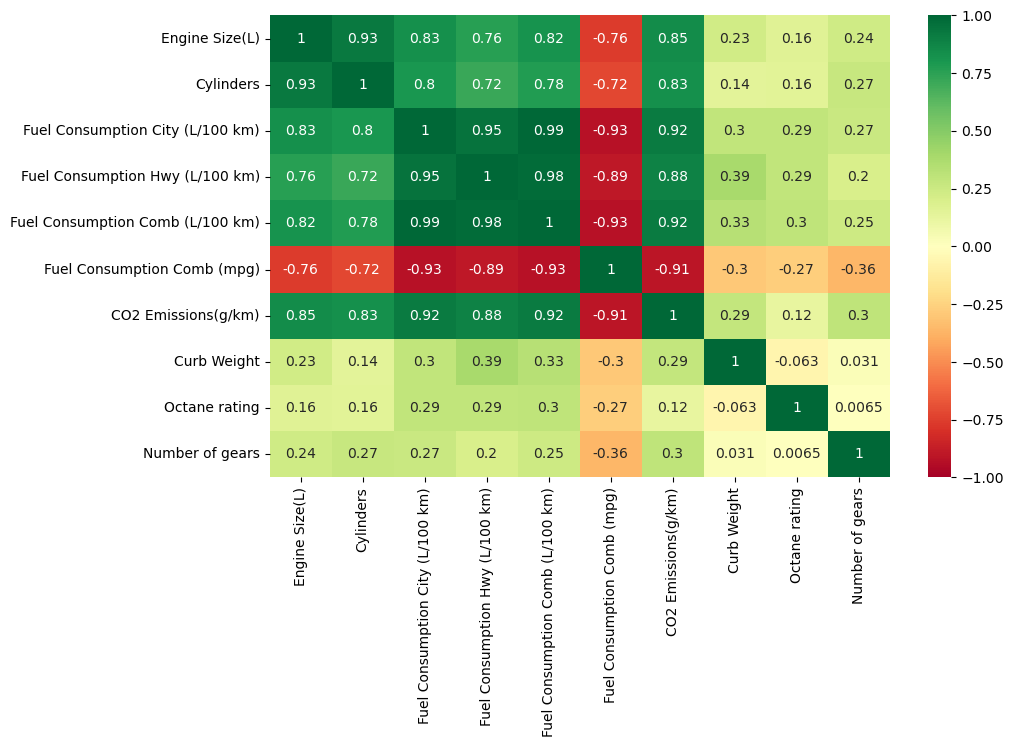

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'RdYlGn', fmt='.2g');

With carbon dioxide emissions (**CO2 Emissions(g/km)**) the fuel consumption combined (**Fuel Consumption Comb (L/100 km)**) - *(0.92)* is the most correlated. Apart from other indicators of fuel consumption, emissions are also highly correlated with engine size (**Engine Size(L)**) - (*0.85*) and number of cylinders (**Cylinders**) - (*0.83*).

I will also build descriptive statistics that may be needed for further analysis.

In [13]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Curb Weight,Octane rating,Number of gears
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699,1.671385,88.277725,6.611510
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679,0.874440,8.147222,1.795264
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000,0.670000,40.000000,0.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000,1.250000,87.000000,6.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000,1.520000,87.000000,6.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000,1.900000,91.000000,8.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000,7.000000,130.000000,10.000000


Let's check how the volume of vehicle emissions depends on the manufacturer's company.

In [14]:
makers_sum_co2 = df.groupby('Make')['CO2 Emissions(g/km)'].sum().sort_values(ascending=False).head(7)
print('Top 7 manufacturers with the highest total CO2 emissions:')
for i in range(len(makers_sum_co2)):
    print(f'{i+1}. {list(makers_sum_co2.keys())[i]} - {list(makers_sum_co2.values)[i]} Грамм/Км', end ='; ')
print('\n')
max_makers = df.groupby('Make')['Make'].count().sort_values(ascending=False).head(7)
print('7 largest vehicle manufacturers:')
for i in range(len(max_makers)):
    print(f'{i+1}. {list(max_makers.keys())[i]} - {list(max_makers.values)[i]} машин', end ='; ')

Top 7 manufacturers with the highest total CO2 emissions:
1. FORD - 163901 Грамм/Км; 2. CHEVROLET - 155436 Грамм/Км; 3. BMW - 133862 Грамм/Км; 4. MERCEDES-BENZ - 116225 Грамм/Км; 5. GMC - 98373 Грамм/Км; 6. PORSCHE - 97362 Грамм/Км; 7. TOYOTA - 74060 Грамм/Км; 

7 largest vehicle manufacturers:
1. FORD - 628 машин; 2. CHEVROLET - 588 машин; 3. BMW - 527 машин; 4. MERCEDES-BENZ - 419 машин; 5. PORSCHE - 376 машин; 6. TOYOTA - 330 машин; 7. GMC - 328 машин; 

The list of the largest manufacturers and the list of manufacturers whose vehicles produced the most emissions are almost the same; only GMC stands out because this division of General Motors specializes in trucks, SUVs, pickups and vans, which emit more emissions than the average vehicle:

In [15]:
print('CO2 emissions from all vehicles on average -', round(df['CO2 Emissions(g/km)'].mean(), 2), 
      ',CO2 emissions from vehicles from GMC on average -', round(df[df['Make'] == 'GMC']['CO2 Emissions(g/km)'].mean(), 2))

CO2 emissions from all vehicles on average - 250.58 ,CO2 emissions from vehicles from GMC on average - 299.92


It can be assumed that other manufacturers are much less "environmentally friendly", you can check this using grouping:

In [16]:
df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(7)

Make
BUGATTI         522.000000
LAMBORGHINI     400.780488
SRT             389.000000
ROLLS-ROYCE     388.480000
BENTLEY         362.934783
ASTON MARTIN    339.617021
MASERATI        318.147541
Name: CO2 Emissions(g/km), dtype: float64

Indeed, the largest average CO2 emissions per vehicle come from different manufacturers than the total emissions. In the future, we will use these findings when building a visualization, and we will try to put forward a hypothesis related to manufacturing companies.
***

Separately, it is also worth considering the use of various types of fuel:

In [17]:
df.groupby('Fuel Type')['Model'].count()

Fuel Type
D     175
E     370
N       1
X    3637
Z    3202
Name: Model, dtype: int64

It can be concluded that gasoline is predominantly used as fuel (`x` regular and `z` premium), while there is only one vehicle using natural gas `N` as fuel. (Namely - Chevrolet Impala Dual Fuel).

In [18]:
df[df['Fuel Type'] == 'N'][['Make', 'Model']]

,Make,Model
2439,CHEVROLET,IMPALA DUAL FUEL


In [19]:
pr = df[(df['Fuel Type'] != 'X') & (df['Fuel Type'] != 'Z')].shape[0]/df.shape[0]*100
print(f'Only {round(pr, 2)}% vehicles in Canada do not use gasoline')

Only 7.39% vehicles in Canada do not use gasoline


You can also build a summary table linking the type of fuel used and the number of cylinders in an engine by looking at the average emissions for them:

In [20]:
pd.pivot_table(df,index=['Fuel Type','Cylinders'],aggfunc={'CO2 Emissions(g/km)':np.mean})

CO2 Emissions(g/km)
Fuel Type Cylinders                     
D         4                   215.460674
          6                   260.406977
E         4                   203.370370
          6                   262.723270
          8                   312.286624
N         6                   213.000000
X         3                   160.432432
          4                   199.208906
          5                   233.150000
          6                   271.614793
          8                   329.651054
          10                  488.000000
Z         3                   184.120690
          4                   216.315735
          5                   244.166667
          6                   256.478861
          8                   317.503667
          10                  358.219512
          12                  381.033113
          16                  522.000000

There is already a noticeable trend here that with an increase in the number of cylinders, the average volume of vehicle emissions increases, and cars with the largest number of cylinders use gasoline as fuel.

# Visualization

### Let's build a graph that reflects the relationship of the following variables:
1. Axis X - Fuel Consumption Comb (L/100 km)**)
2. Y axis - Number of cylinders in the engine (**Cylinders**)
3. The size of the "dot" (**Engine Size(L)**) - the size of the engine (multiplied by 200 to make the model more visual)
4. Color - Carbon Dioxide Emissions (**CO2 Emissions(g/km)**) (the more saturated (closer to red) the color, the more CO2 emissions)

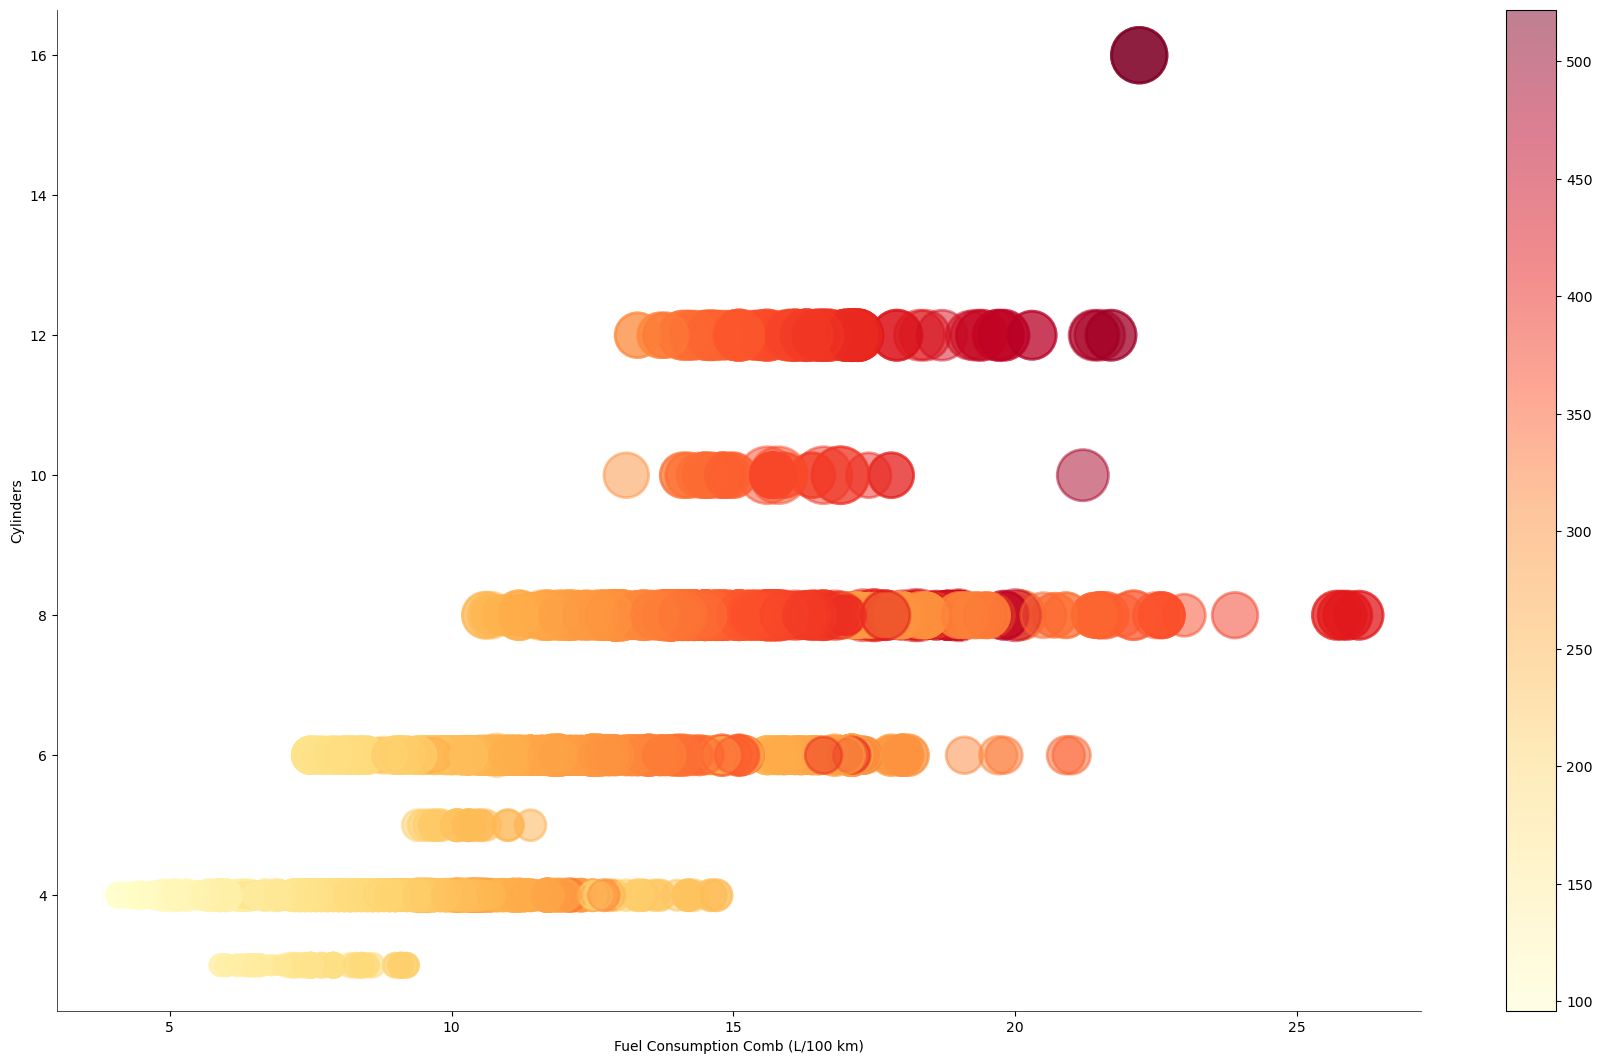

In [21]:
fig, ax = plt.subplots(figsize = (22,13))

color_graph = ax.scatter(df['Fuel Consumption Comb (L/100 km)'],
                         df['Cylinders'], s = df['Engine Size(L)']*200, c = df['CO2 Emissions(g/km)'],
                         cmap = 'YlOrRd', alpha = 0.5, linewidth = 2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Fuel Consumption Comb (L/100 km)', fontsize = 10)
ax.set_ylabel('Cylinders', fontsize = 10)                                             
plt.colorbar(color_graph);

This composite graph shows that as the number of cylinders (**Cylinders**), fuel consumption (**Fuel Consumption Comb (L/100 km)**) and engine size (**Engine Size(L)) increase, **), carbon dioxide emissions increase (color saturation becomes higher (closer to red)).

### Let's try to work with the visualization of distributions by type of fuel used:
1. Pie and bar charts for average emissions for each fuel used
2. Let's build a pie and column charts for the total values of emissions for each type of fuel used

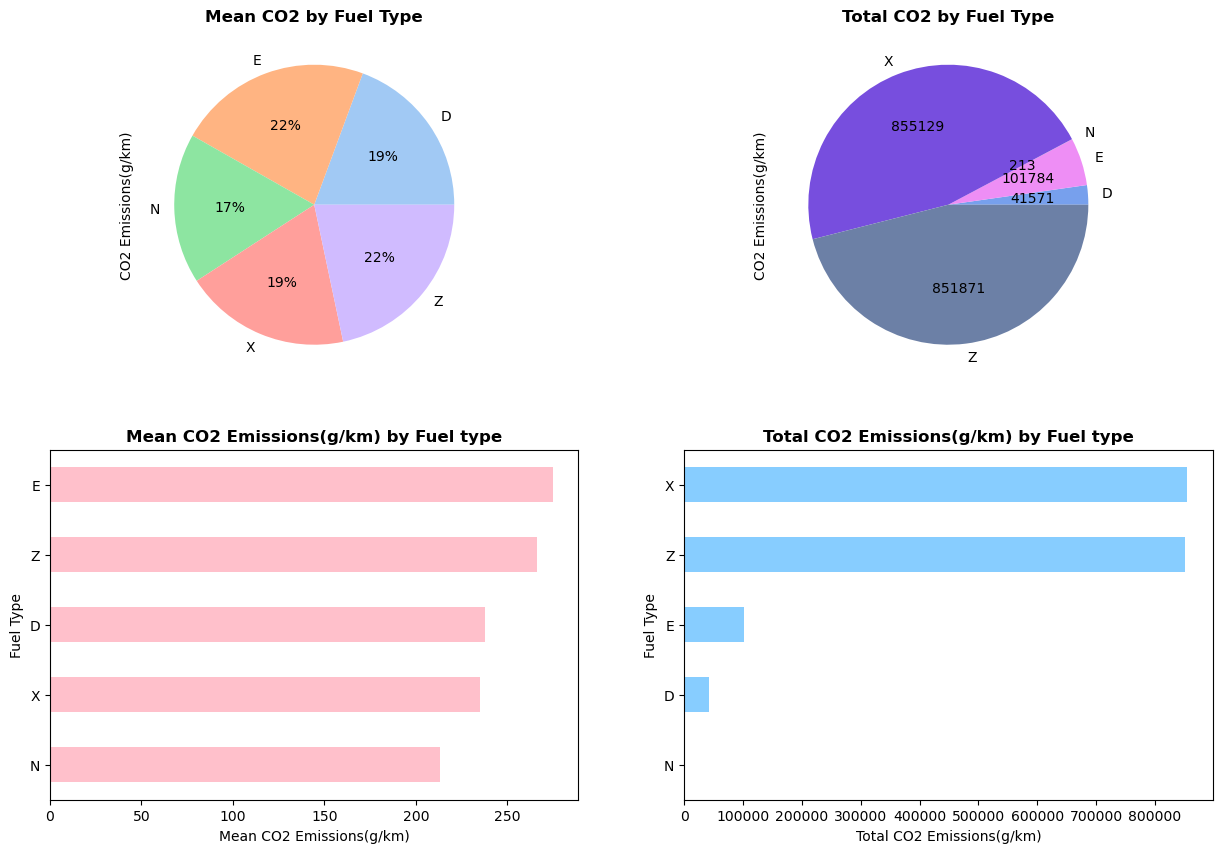

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().plot(
    kind='pie', autopct='%1.0f%%',
    colors = sns.color_palette('pastel'), ax=ax[0,0])
ax[0,0].set_title('Mean CO2 by Fuel Type', fontweight='bold')

df.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum().plot(
    kind='pie', colors = ['#77a0ed', '#ee8ef5', '#aaed95', '#774ede', '#6c80a6'],
    autopct=lambda p: '{:.0f}'.format(p * sum(df.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum()) / 100), ax=ax[0,1])
ax[0,1].set_title('Total CO2 by Fuel Type', fontweight='bold')

df_data_mean = pd.DataFrame(df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean())
df_data_sum = pd.DataFrame(df.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum())

df_data_mean.sort_values(by=['CO2 Emissions(g/km)'])['CO2 Emissions(g/km)'].plot(kind='barh', color='pink', ax=ax[1,0]) 
ax[1,0].set_title('Mean CO2 Emissions(g/km) by Fuel type', fontweight='bold')
ax[1,0].set_xlabel('Mean CO2 Emissions(g/km)')

df_data_sum.sort_values(by=['CO2 Emissions(g/km)'])['CO2 Emissions(g/km)'].plot(kind='barh', color='#87cdff', ax=ax[1,1]) 
ax[1,1].set_title('Total CO2 Emissions(g/km) by Fuel type', fontweight='bold');
ax[1,1].set_xlabel('Total CO2 Emissions(g/km)');

The graphs show that although vehicles using ethanol (**E**) as a fuel have the highest emissions on average, due to the small number of such vehicles, the total CO2 emissions from it are low, which is not the case. conventional gasoline (**X**), which despite having relatively low average emissions, cars that use it as fuel, are collectively the "Leader" in carbon dioxide emissions. The least toxic is natural gas (**N**), but it is practically not used.

### Let's get back to manufacturing companies. We visualize the largest total and average carbon dioxide emissions by vehicle brands:

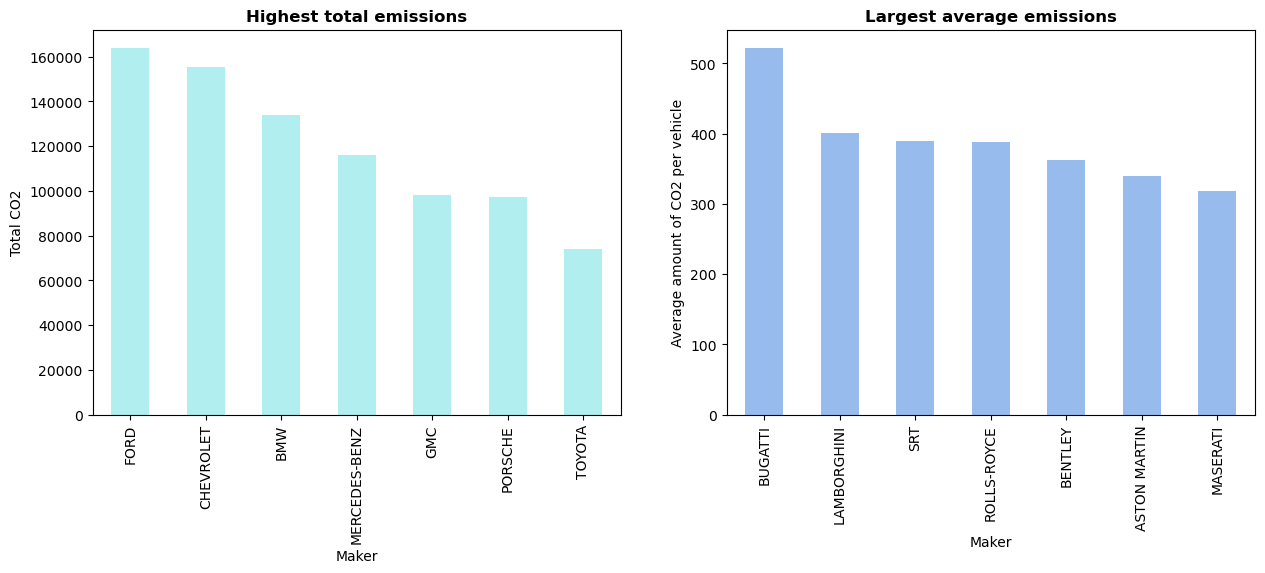

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Make')['CO2 Emissions(g/km)'].sum().sort_values(ascending=False).head(7).plot(kind = 'bar', ax=ax[0], color = '#b1eef0')
df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(7).plot(kind = 'bar', ax=ax[1], color = '#98bbed');
ax[0].set_title('Highest total emissions', fontweight='bold')
ax[0].set_xlabel('Maker')
ax[0].set_ylabel('Total CO2');

ax[1].set_title('Largest average emissions', fontweight='bold')
ax[1].set_xlabel('Maker')
ax[1].set_ylabel('Average amount of CO2 per vehicle');

The graphs above clearly demonstrate what we learned during the reconnaissance analysis, namely that the list of the most toxic producers in general and the list of the most toxic producers on average are drastically different.

**Also remember the largest transport manufacturers**

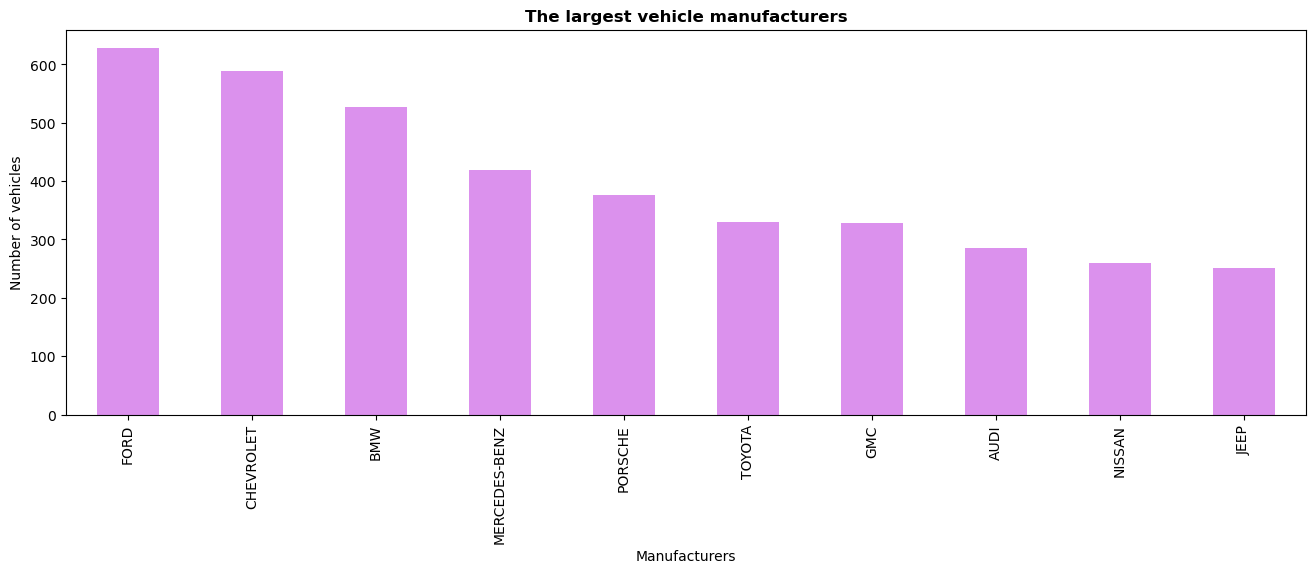

In [24]:
fig, ax = plt.subplots(figsize = (16,5))
df.groupby('Make')['Make'].count().sort_values(ascending=False).head(10).plot(kind = 'bar', color = '#db91ed');
ax.set_title('The largest vehicle manufacturers', fontweight='bold')
ax.set_xlabel('Manufacturers')
ax.set_ylabel('Number of vehicles');

## Let's test the hypothesis about the equality of the expected emissions from transport produced by the two largest companies
### Let's take the two largest manufacturers - FORD and CHEVROLET

In [25]:
largest_makers = list(df.groupby('Make')['Model'].count().sort_values(ascending=False).head(2).keys())
print('The two largest manufacturers are', *largest_makers)

The two largest manufacturers are FORD CHEVROLET


$H_0$: no significant difference in vehicle emissions from Ford and Chevrolet (no difference in averages)

H1: there is a difference and it is statistically significant

$H_0 : \mu_1 = \mu_2$

$H_1 : \mu_1 != \mu_2$

* Critical value of t-test: ±1.9667

Let's check the distributions for normality:

In [26]:
chev = df[df['Make'] == 'CHEVROLET']['CO2 Emissions(g/km)']
ford = df[df['Make'] == 'FORD']['CO2 Emissions(g/km)']
from scipy import stats

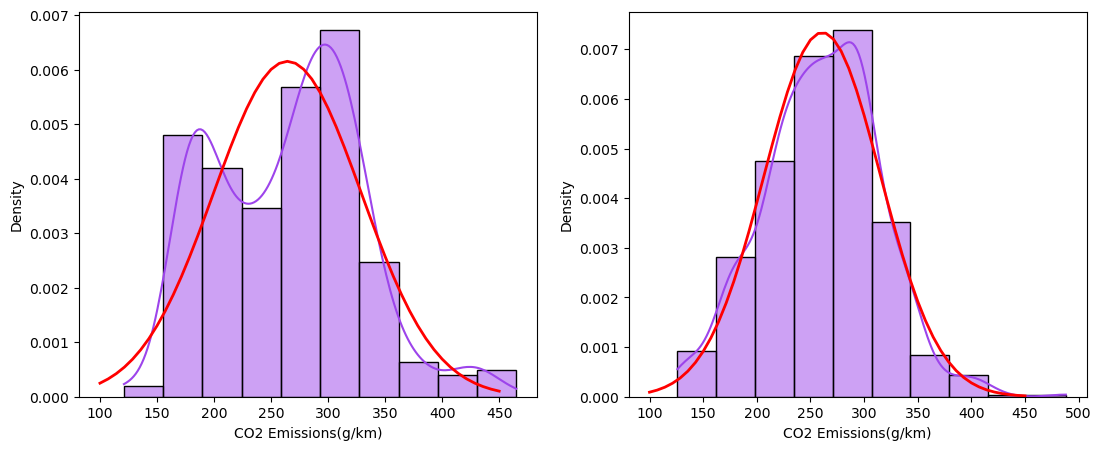

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.histplot(chev, bins=10, stat='density', kde=True, ax=ax[0], color = '#9d44eb')
xs = np.linspace(100,450)
pdf = stats.norm(chev.mean(), chev.std(ddof=1)).pdf(xs)
ax[0].plot(xs, pdf, lw=2, color='red')

sns.histplot(ford, bins=10, stat='density', kde=True, ax=ax[1], color = '#9d44eb')
xs = np.linspace(100,450)
pdf = stats.norm(ford.mean(), ford.std(ddof=1)).pdf(xs)
ax[1].plot(xs, pdf, lw=2, color='red')
plt.show()

In [28]:
stats.kstest(chev, 'norm', args=(df['CO2 Emissions(g/km)'].mean(), df['CO2 Emissions(g/km)'].std(ddof=1)))

KstestResult(statistic=0.1639895238579578, pvalue=2.7561273352175834e-14)

In [29]:
stats.kstest(ford, 'norm', args=(df['CO2 Emissions(g/km)'].mean(), df['CO2 Emissions(g/km)'].std(ddof=1)))

KstestResult(statistic=0.09419398668807966, pvalue=2.6674660390854105e-05)

P-value in both cases is very low, which means that the hypothesis of sample normality is rejected.

In [30]:
print(chev.var(), ford.var())

4207.187775962178 2953.8387910279544


The variances are also different

We saw that the data is not normally distributed, so we use an asymptotic test.

In [31]:
def hypothesis_check(obs, crit):
    if abs(obs) > crit:
        print('H0 is rejected. The difference between the means is statistically significant.')
    else:
        print('Do not reject H0')

If we assume that the samples are large enough, they have no outliers and are independent, then we can use the CLT, as well as the properties of the normal distribution, and obtain the following criterion for testing the hypothesis:

$$
z=\dfrac{\bar{x}-\bar{y}}{\sqrt{\dfrac{\hat{\sigma}_{x}^{2}}{n_x}+\dfrac{\hat{\sigma}_{y}^{2}}{n_y}}} \sim N(0,1)
$$



In [32]:
alpha = 0.05
nx, ny = chev.size, ford.size
diff = chev.mean() - ford.mean()
diff_std = np.sqrt(chev.var(ddof=1)/nx + ford.var(ddof=1)/ny)
z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha/2)

hypothesis_check(z_obs, z_crit)

Do not reject H0


Hypothesis $H_0 : \mu_1 = \mu_2$ is not rejected, the expectation of carbon dioxide emissions is indeed company independent when it comes to the largest manufacturers

# Machine learning

## The target variable in the regression problem is carbon dioxide emissions (*CO2 Emissions(g/km)*)

**First of all, check the distribution of the variable for normality**

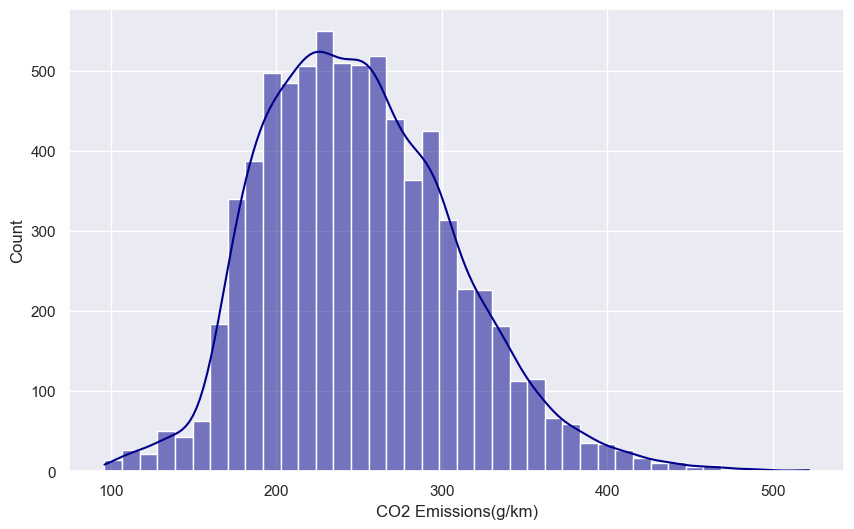

In [33]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(df['CO2 Emissions(g/km)'], bins=40, kde=True, color='darkblue');

**Using the Shapiro-Wilk test:**

In [34]:
from scipy.stats import shapiro
stat, p = shapiro(df['CO2 Emissions(g/km)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The variable has a normal distribution (fail to reject H0)')
else:
    print('The variable does not have a normal distribution (reject H0)')

Statistics=0.984, p=0.000
The variable does not have a normal distribution (reject H0)


/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Building a regression model

Before building a model, I have to deal with categorical values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  Curb W

In [36]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Make
Model
Vehicle Class
Transmission
Fuel Type


Feaatures above have to be transformed to numeric values (categories)

In [37]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Make                              7385 non-null   category
 1   Model                             7385 non-null   category
 2   Vehicle Class                     7385 non-null   category
 3   Engine Size(L)                    7385 non-null   float64 
 4   Cylinders                         7385 non-null   int64   
 5   Transmission                      7385 non-null   category
 6   Fuel Type                         7385 non-null   category
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64 
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64 
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64 
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64   
 11  CO2 Emissions(g/km)               7385 non-null   int64 

In [39]:
df.Make.cat.codes

0        0
1        0
2        0
3        0
4        0
        ..
7380    41
7381    41
7382    41
7383    41
7384    41
Length: 7385, dtype: int8

Now Iwill turn categorical variables into numbers


In [40]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

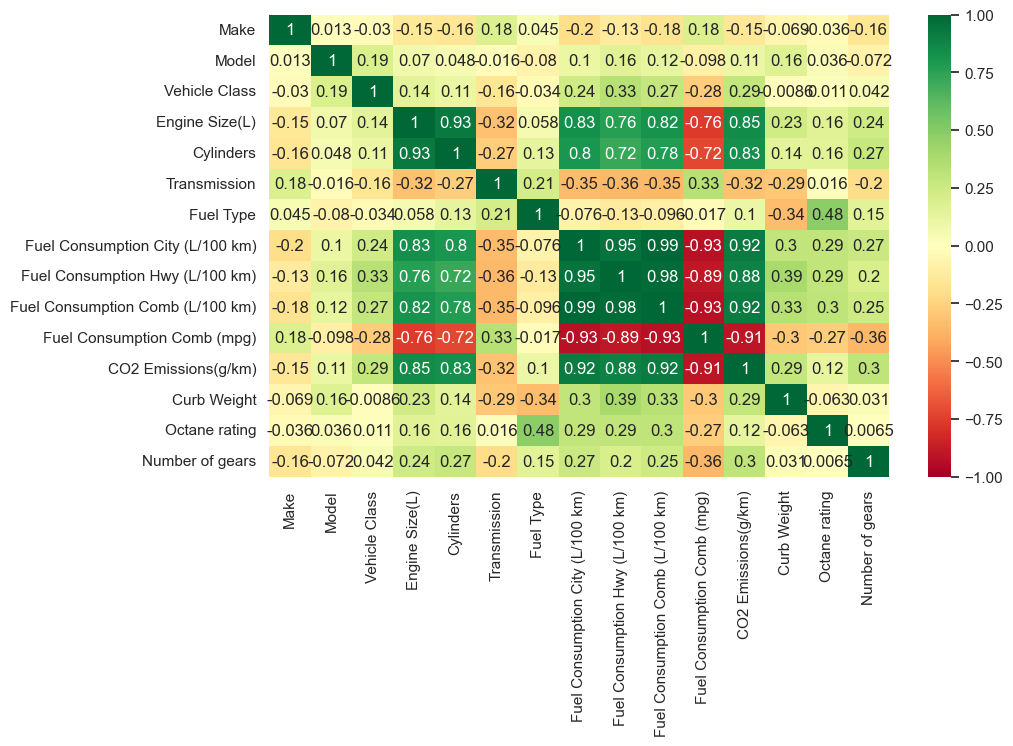

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'RdYlGn', fmt='.2g');

We have already seen the correlation matrix, but for modeling I will delete all features regarding fuel consumpton exsept one: **Fuel Consumption Comb (L/100 km)**. I do this because the correlation between independent variables is too high and this might negatiely affect the model

In [42]:
df.drop(columns=['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
                      'Fuel Consumption Comb (mpg)'], inplace=True)

In [43]:
df.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Curb Weight,Octane rating,Number of gears
0,0,1057,0,2.0,4,14,4,8.5,196,1.25,91,5
1,0,1057,0,2.4,4,25,4,9.6,221,1.25,91,6
2,0,1058,0,1.5,4,22,4,5.9,136,1.25,91,7


Now I will split the data into train/test sets

In [44]:
X, y = df.drop('CO2 Emissions(g/km)', axis=1), df['CO2 Emissions(g/km)']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=97)

Now I will create an evaluating function. For evaluating I will use MAE, RMSLE, R^2

In [46]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)

In [48]:
%%time

model.fit(X_train, y_train)

CPU times: user 1.43 s, sys: 82.3 ms, total: 1.52 s
Wall time: 295 ms


RandomForestRegressor(n_jobs=-1)

In [49]:
show_scores(model)

{'Training MAE': 0.8800229440921301,
 'Test MAE': 1.812296062960586,
 'Training RMSLE': 0.006180054968270076,
 'Test RMSLE': 0.010962483379787677,
 'Training R^2': 0.9993372436403883,
 'Test R^2': 0.9975436398207828}

It doesn't look like the model needs tuning, but I will try to tune the model using RandomizedSearchCV anyway

In [50]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/alexeyks/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

CPU times: user 14.9 s, sys: 153 ms, total: 15.1 s
Wall time: 15.1 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [51]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

In [52]:
show_scores(rs_model)

{'Training MAE': 1.6608730250219297,
 'Test MAE': 2.1876054604173474,
 'Training RMSLE': 0.013647249388300168,
 'Test RMSLE': 0.0186056317849011,
 'Training R^2': 0.9971324728139113,
 'Test R^2': 0.99405417870959}

The scoring parameters shows that model works grat with existing data.